#Data Engineering: Feature Scaling

Feature scaling is a recalculation of feature values such that they fall proportionally within a small range between -1 and 1 or 0 and 1.

The two most common feature scaling techniques are normalisation and standardisation.
1. **Normalization** rescales to a range of 0 to 1. After rescaling, the maximum value equals 1 and the minimum equals 0. This is especially helpful to distance based algorithms, such as SVM, KNN, and KMeans.
2. **Standardization** rescales to a mean of 0 and a standard deviation of 1 (unit variance). In this case, outcomes are not restricted to a particular range.

###General Guidelines 
* In general, apply standardisation when values already have a normal (Gaussian) distribution; normalisation if not.
* Ultimately, rely on domain knowledge and the business problem to determine which technique to use.
* Avoid **Data Leakage** by applying the techniques only to training datasets. If applied prior to splitting, knowledge of test and validation data leaks into training, which can adversely impact prediction.

For More Infomation: [How to Avoid Data Leakage When Performing Data Preparation](https://machinelearningmastery.com/data-preparation-without-data-leakage/)

###Methods
1. StandardScaler (Standardiser)
2. MinMaxScaler (Normaliser)
4. RobustScaler (Normaliser that removes outliers)
4. Normalizer (for use with 3D+ data)

#Demonstration with StandardScaler

Scikit-Learn's StandardScaler assumes each feature is normally distributed and scales each value such that the outcome is centered around 0, with a standard deviation of 1.

Each value (z) is x minus the mean over the standard deviation.

In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

Demonstrate on three hypothetical features with different ranges, generated with numpy random.normal.

In [ ]:
np.random.seed(1)
# Parameters are the mean, the sd, and the size.
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(3, 5, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

In [ ]:
df.head()

,x1,x2,x3
0,3.248691,2.387630,-14.657819
1,-1.223513,4.140849,-5.802131
2,-1.056344,1.238474,-9.161098
3,-2.145937,-1.152767,-6.030558
4,1.730815,1.694551,0.131275


In [ ]:
#Instantiate the functionality
scaler = preprocessing.StandardScaler()
#Fit the method to the entire df and store the output
scaled_df = scaler.fit_transform(df)
#Cast the output as a dataframe
scaled_df = pd.DataFrame(scaled_df, columns=['x1','x2','x3'])
scaled_df.head(20)

,x1,x2,x3
0,1.616535,-0.131753,-1.924757
1,-0.622285,0.218475,-0.146416
2,-0.538598,-0.361311,-0.820942
3,-1.084057,-0.838991,-0.192287
4,0.856675,-0.270204,1.045092
5,-2.314121,0.159729,0.988572
6,1.737148,0.663399,-0.213069
7,-0.771917,-0.336237,-0.096189
8,0.309642,-0.314361,-0.588513
9,-0.259458,0.514818,1.153422


In [ ]:
scaled_df['x1'].std()

1.0000500037503115

In [ ]:
scaled_df['x2'].std()

1.0000500037503108

In [ ]:
scaled_df['x3'].std()

1.0000500037503137

Plot the new data

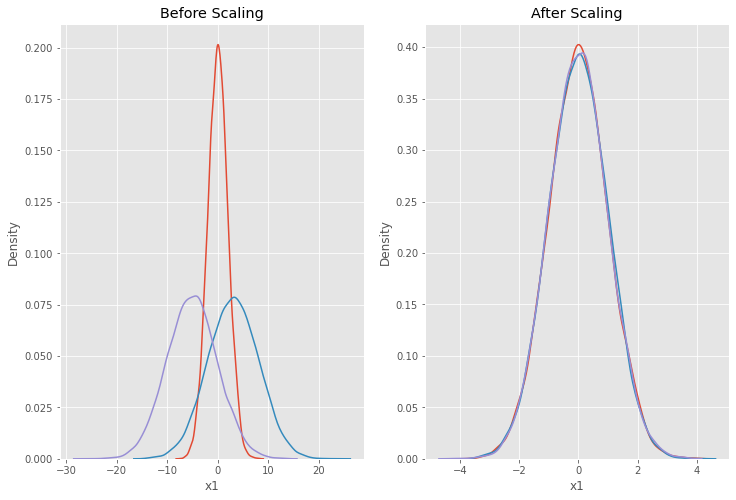

In [ ]:
#Create a figure with two axes to show distributions before and after.
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,8))

#Add three kdeplots to the first axis using the original dataset.
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

#Add three kdeplots to the second axis using the revised dataset.
ax2.set_title('After Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)

#Show the plots.
plt.show()

Comparable scales mean deep learning gradients, for example, descent more smoothly.

#Standardizing Medical Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/pima-indians-diabetes-2.csv',
                 encoding='utf-8',
                 header=0)
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe() #Numeric columns

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Very different ranges are seen in the dataset. Distance based algorithms such as SVM will not work well on this dataset, features with high values will dominate features with low values. 

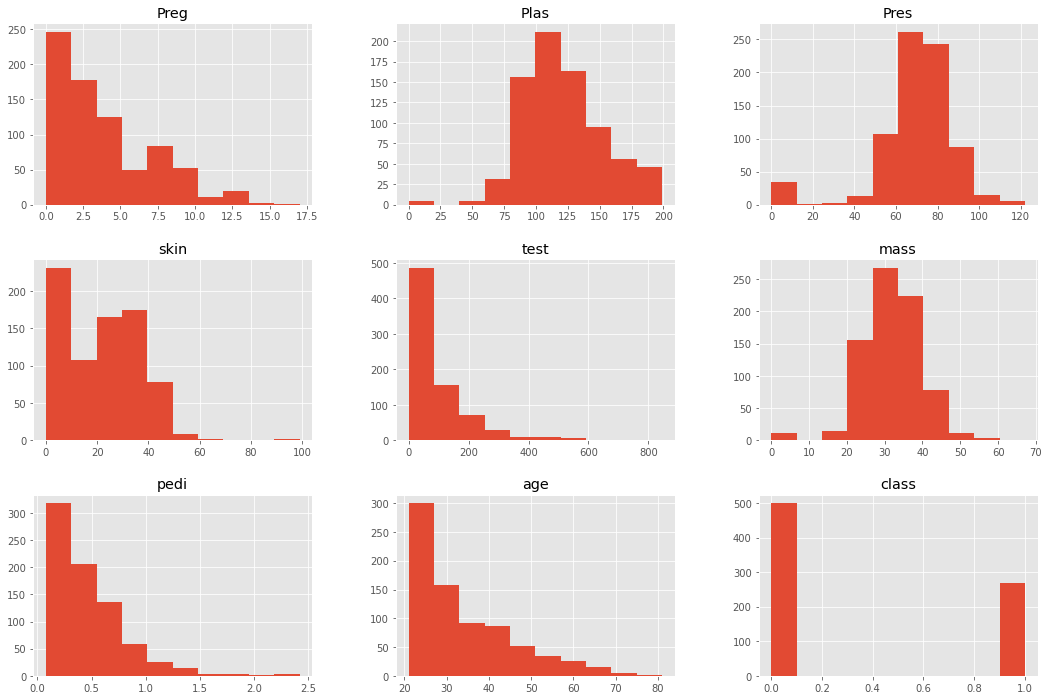

In [ ]:
df.hist(figsize=(18,12))
plt.show()

Ranges on the x-axis have huge differences in scale. Sklearn offers a method to harmonize called the StandardScaler.

In [ ]:
#Instantiate the functionality.
scaler = preprocessing.StandardScaler()

#Fit transform and store the output
scaled_df = scaler.fit_transform(df)

#Cast the output as a dataframe, round all values to 2 places, and reapply column names.
scaled_df = pd.DataFrame(np.round(scaled_df,2), columns=df.columns)
scaled_df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,0.64,0.85,0.15,0.91,-0.69,0.20,0.47,1.43,1.37
1,-0.84,-1.12,-0.16,0.53,-0.69,-0.68,-0.37,-0.19,-0.73
2,1.23,1.94,-0.26,-1.29,-0.69,-1.10,0.60,-0.11,1.37
3,-0.84,-1.00,-0.16,0.15,0.12,-0.49,-0.92,-1.04,-0.73
4,-1.14,0.50,-1.50,0.91,0.77,1.41,5.48,-0.02,1.37
...,...,...,...,...,...,...,...,...,...
763,1.83,-0.62,0.36,1.72,0.87,0.12,-0.91,2.53,-0.73
764,-0.55,0.03,0.05,0.41,-0.69,0.61,-0.40,-0.53,-0.73
765,0.34,0.00,0.15,0.15,0.28,-0.74,-0.69,-0.28,-0.73
766,-0.84,0.16,-0.47,-1.29,-0.69,-0.24,-0.37,1.17,1.37


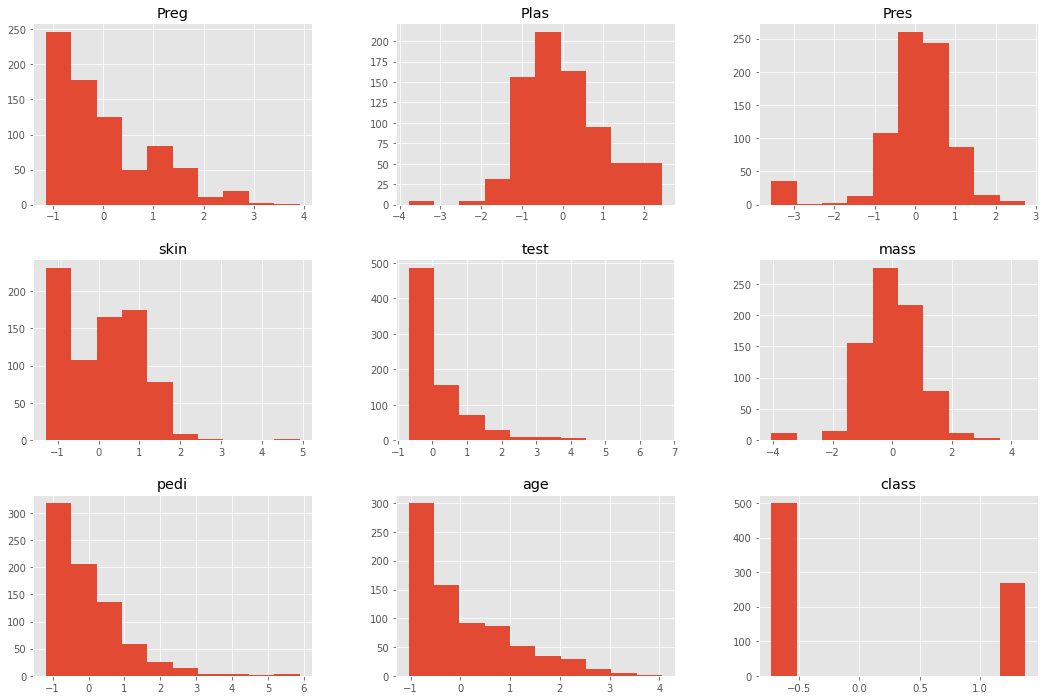

In [ ]:
scaled_df.hist(figsize=(18,12))
plt.show()

Now there is harmony in the scales.

#**Min-Max Scaler** (Normalisation)

The MinMaxScaler rescales values such that the range is between 0 and 1, or -1 to 1, if there are negative values. 

* Use when the distribution is not Gaussian, or the standard deviation is very small.
* If there are outliers, consider removing them first, or use the **Robust Scaler** instead. 



In [ ]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

Apply **MinMaxScaler**

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

**Visualise**

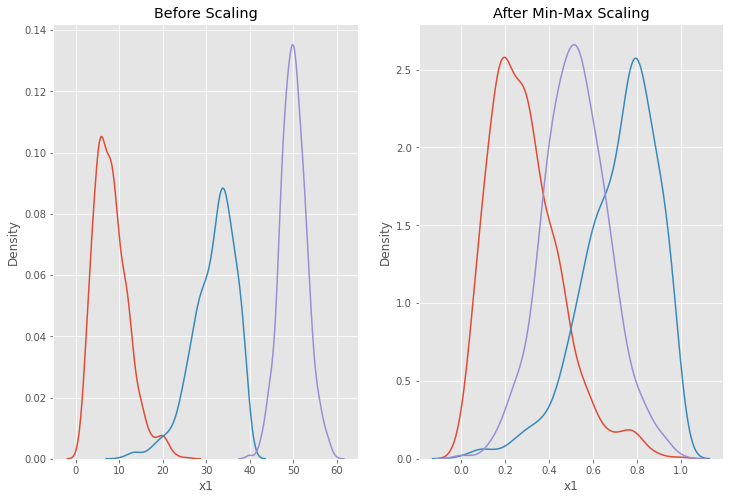

In [ ]:
#Create a figure with 2 axes and 2 columns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 8))

#Add 3 kdeplots for the features before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

#Add 3 kdeplots for the features after scaling
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)

#Show the plot
plt.show()

Skewness in the distributions is still present but on the same scale.

<br>

#**Robust Scaler** (Normaliser)

The RobustScaler incorporates quantiles into the calculation, which makes it robust to outliers. It uses a similar method as the Min-Max scaler but chooses its min and max from the interquartile range. 

Each value (z) is x - Q1 / Q3-Q1.

In [ ]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

Apply **MinMaxScaler**

In [ ]:
#Instantiate
scaler = preprocessing.MinMaxScaler()
#Fit transform
minmax_scaled_df = scaler.fit_transform(x)
#Cast as dataframe and reapply column names
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

Apply **RobustScaler**

In [ ]:
#Instantiate
scaler = preprocessing.RobustScaler()
#Fit transform
robust_scaled_df = scaler.fit_transform(x)
#Cast as dataframe and reapply column names
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

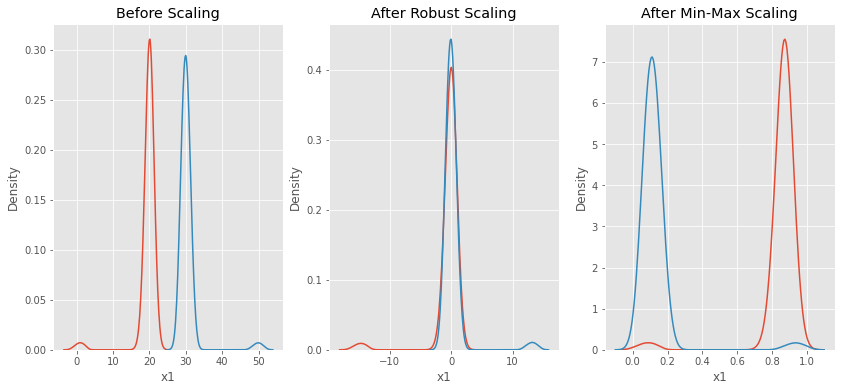

In [ ]:
#Create a figure and 3 axes for the 3 columns to compare the original, robust, and min-max.
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14, 6))

#original
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)

#robust
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)

#min_max
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

After **Robust Scaling**, the distributions share the same scale; outliers remain outside the center of the distributions.

In **Min-Max Scaling**, the two normal distributions are seperated by outliers that persist into the 0-1 range.

#**Normalizer** (3D+)

The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.



In [ ]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

Apply **Normalizer**

In [ ]:
#Instantiate
scaler = preprocessing.Normalizer()
#Fit transform
scaled_df = scaler.fit_transform(df)
#Cast as dataframe and reapply column names
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

**Visualise**

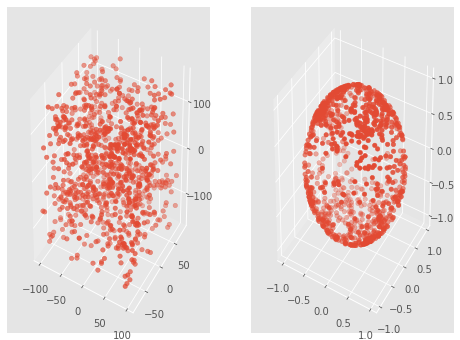

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.show()

When normalization is applied in 3D, the outcome is a sphere, where all values are at most 1 away from the origin.